# Data Pre-processing

In [1]:
%pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Data manipulation libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import train_test_split
from scipy.stats import skew
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [4]:
df_train = pd.read_csv('heart_disease_train.csv', index_col = 'Id')
df_test = pd.read_csv('heart_disease_test_all.csv', index_col = 'Id')

In [5]:
print('Train Shape (rows, columns):', df_train.shape)
print('Test Shape (rows, columns):', df_test.shape)

Train Shape (rows, columns): (734, 12)
Test Shape (rows, columns): (184, 12)


In [6]:
df_train.isnull().sum()

Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df_test.isnull().sum()

Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
categorical_features = ['Gender', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for feature in categorical_features:
    df_train[feature] = df_train[feature].astype('category')
    df_test[feature] = df_test[feature].astype('category')

In [9]:
df_train.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Id,,,,,,,,,,,,
PT1000,42,M,ATA,120,198,0,Normal,155,N,0.0,Up,0
PT1001,54,M,ASY,140,239,0,Normal,160,N,1.2,Up,0
PT1002,60,M,NAP,141,316,1,ST,122,Y,1.7,Flat,1
PT1003,54,M,ASY,124,266,0,LVH,109,Y,2.2,Flat,1
PT1004,55,M,ATA,160,292,1,Normal,143,Y,2.0,Flat,1


In [10]:
df_test.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Id,,,,,,,,,,,,
PT1800,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down,1
PT1801,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1
PT1802,47,F,ATA,140,257,0,Normal,135,N,1.0,Up,0
PT1803,64,M,ASY,141,244,1,ST,116,Y,1.5,Flat,1
PT1804,47,M,NAP,110,0,1,Normal,120,Y,0.0,Flat,1


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, PT1000 to PT1733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             734 non-null    int64   
 1   Gender          734 non-null    category
 2   ChestPainType   734 non-null    category
 3   RestingBP       734 non-null    int64   
 4   Cholesterol     734 non-null    int64   
 5   FastingBS       734 non-null    category
 6   RestingECG      734 non-null    category
 7   MaxHR           734 non-null    int64   
 8   ExerciseAngina  734 non-null    category
 9   Oldpeak         734 non-null    float64 
 10  ST_Slope        734 non-null    category
 11  HeartDisease    734 non-null    category
dtypes: category(7), float64(1), int64(4)
memory usage: 40.4+ KB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, PT1800 to PT1983
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             184 non-null    int64   
 1   Gender          184 non-null    category
 2   ChestPainType   184 non-null    category
 3   RestingBP       184 non-null    int64   
 4   Cholesterol     184 non-null    int64   
 5   FastingBS       184 non-null    category
 6   RestingECG      184 non-null    category
 7   MaxHR           184 non-null    int64   
 8   ExerciseAngina  184 non-null    category
 9   Oldpeak         184 non-null    float64 
 10  ST_Slope        184 non-null    category
 11  HeartDisease    184 non-null    category
dtypes: category(7), float64(1), int64(4)
memory usage: 10.8+ KB


In [ ]:
# No missing values in either training or testing data at the current stage.
# There are text values in some columns, which need to be converted into numerical data later.

# Data Exploration

## Statistics

In [13]:
df_train.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.602180,132.957766,198.339237,136.426431,0.902180
std,9.528147,18.819299,109.263181,25.729613,1.050003
min,28.000000,0.000000,0.000000,63.000000,-2.000000
25%,47.000000,120.000000,172.000000,120.000000,0.000000
50%,54.000000,130.000000,222.500000,138.000000,0.600000
75%,60.000000,141.750000,265.000000,155.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [14]:
df_train.describe(include = 'category')

,Gender,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
count,734,734,734,734,734,734,734
unique,2,4,2,3,2,3,2
top,M,ASY,0,Normal,N,Flat,1
freq,578,403,562,443,432,379,406


In [15]:
df_train['HeartDisease'].value_counts(normalize=True).to_frame()

,proportion
HeartDisease,
1,0.553134
0,0.446866


In [ ]:
# 55.31% of data is identified as patients having the heart disease
# 44.68% of data is identified as patients not having the heart disease.
# The data is quite balanced.

## Visualization

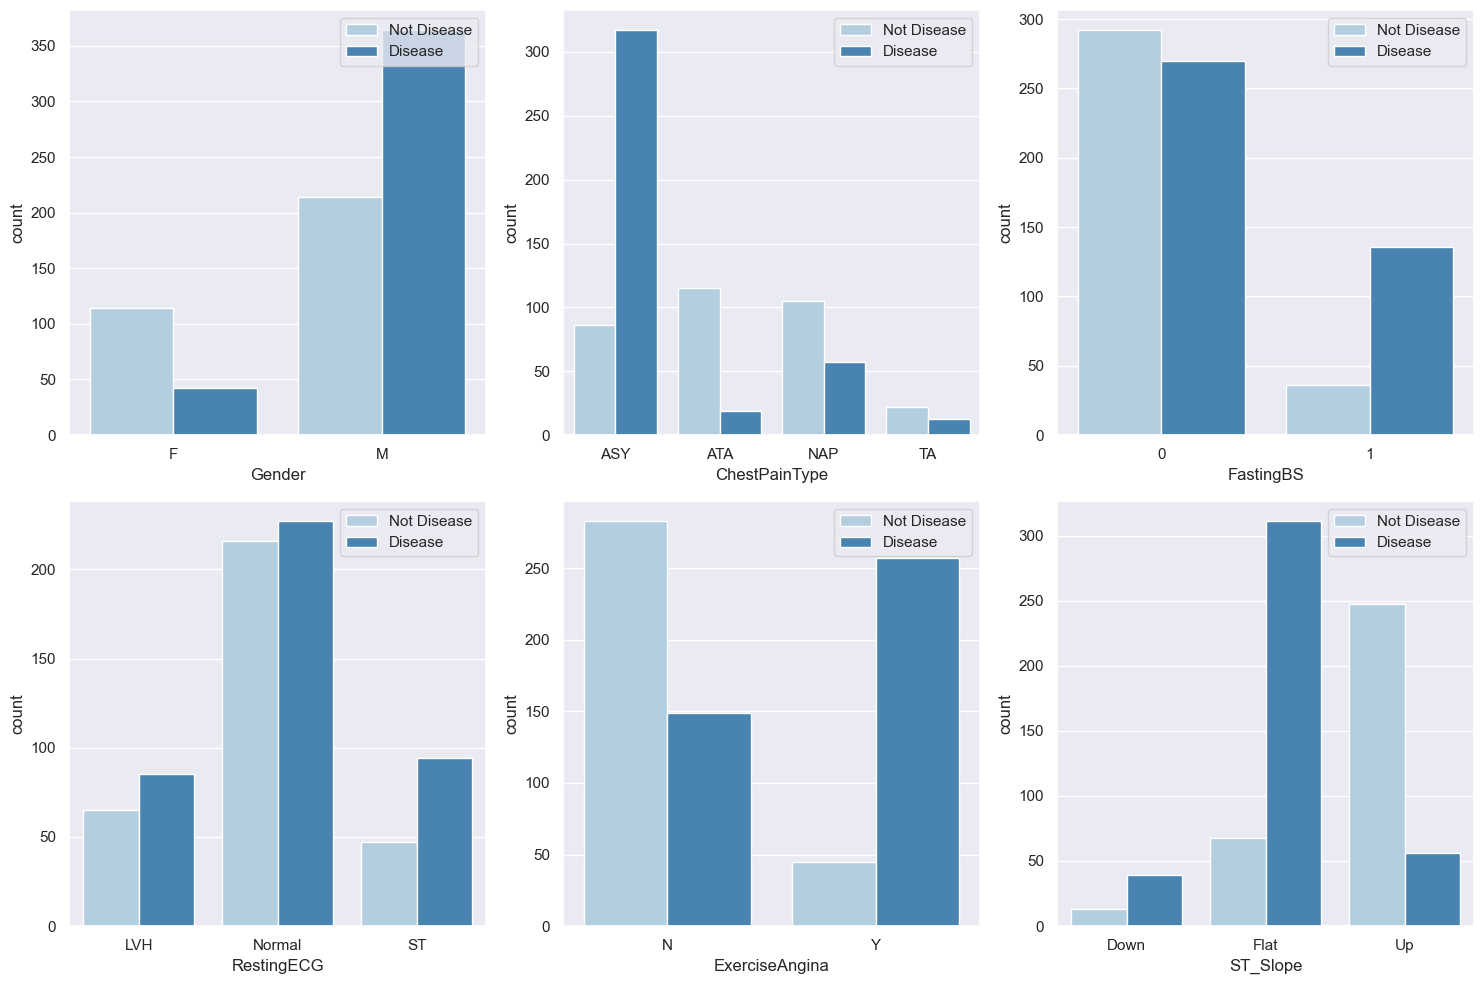

In [16]:
cols = ['Gender', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=df_train, x = cols[i], hue = 'HeartDisease', palette = 'Blues', ax = ax_i)
            ax_i.legend(title='', loc='upper right', labels=['Not Disease', 'Disease'])
plt.tight_layout()

In [ ]:
# More male patients having heart disease compared to female patients.
# Patients having ASY Chest pain type (No symptoms) have more chances of getting a heart disease.
# While those having ATA anf NAP Chest pain type have less chances of getting a heart disease.
# Patients having high blood sugar (above 120mg/dl) have more chances of getting a heart disease.
# Patients having ST as their resting electocardiogram results have more chances of getting a heart disease.
# Patients having exercise-induced angina have more chances of getting a heart disease.
# Patients having flat ST slope have more chances of getting a heart disease.
# While those having up ST slope have less chances of getting a heart disease.

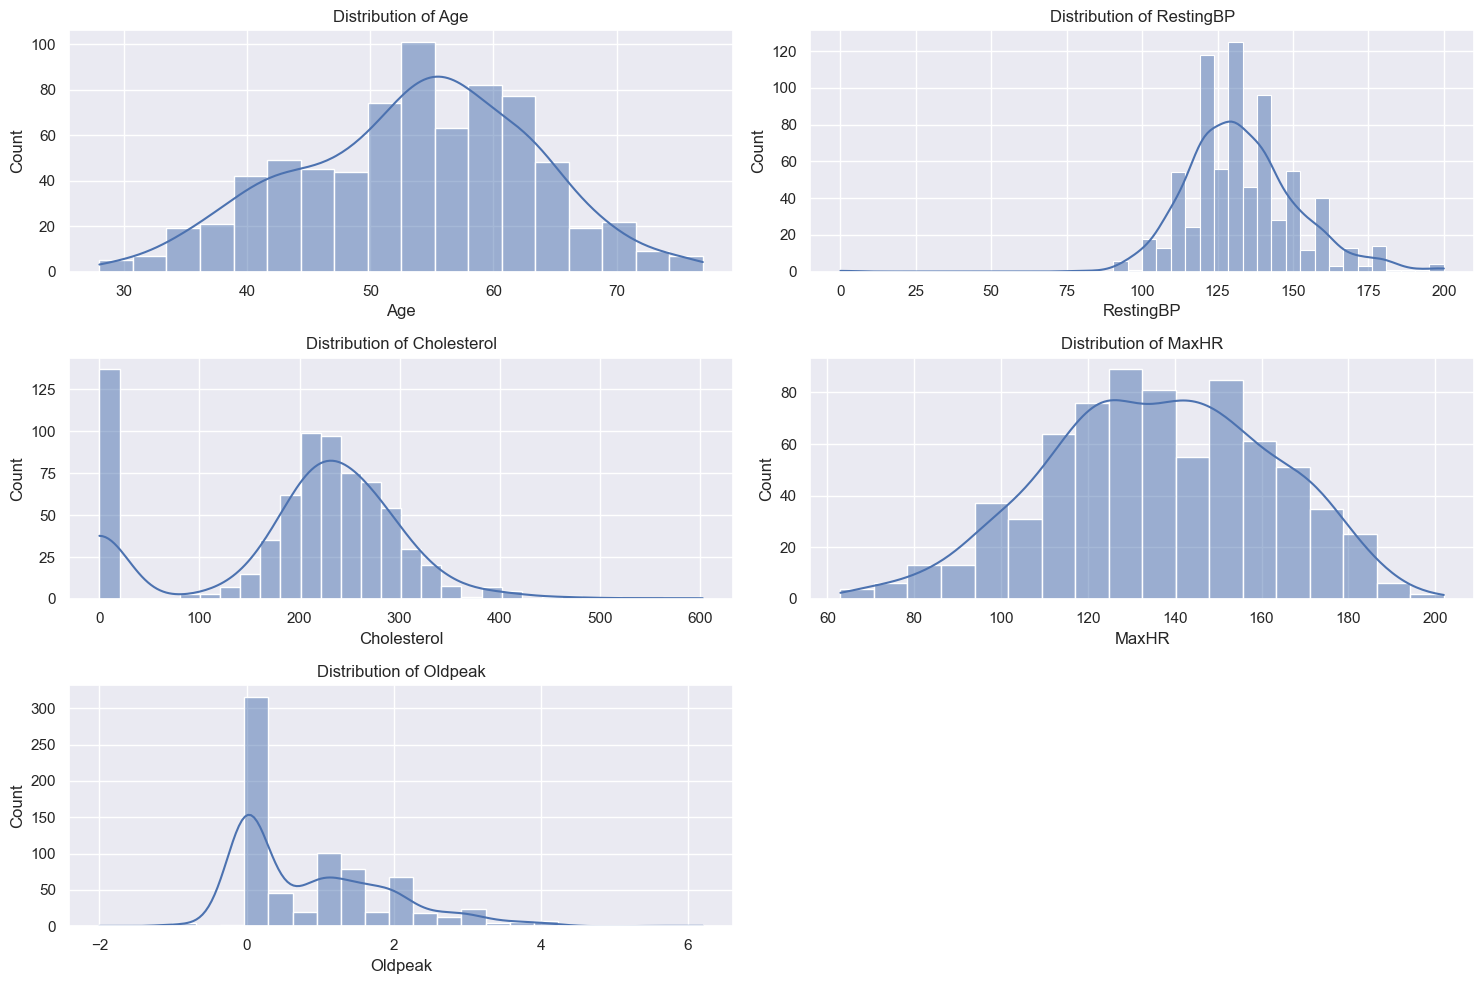

In [17]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(df_train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
# Distribution of "Oldpeak" shows a slightly skewness which needs to be checked later.
# Other features visually have normal distributions.

# Feature Engineering

## Coverting Categorical Features

In [18]:
sex_mapping = {"M": 0, "F": 1}
df_train['Gender'] = df_train['Gender'].map(sex_mapping)
df_test['Gender'] = df_test['Gender'].map(sex_mapping)

pain_mapping = {"ATA": 0, "ASY": 1, "NAP": 2, "TA": 3}
df_train['ChestPainType'] = df_train['ChestPainType'].map(pain_mapping)
df_test['ChestPainType'] = df_test['ChestPainType'].map(pain_mapping)

ecg_mapping = {"Normal": 0, "ST": 1, "LVH": 2}
df_train['RestingECG'] = df_train['RestingECG'].map(ecg_mapping)
df_test['RestingECG'] = df_test['RestingECG'].map(ecg_mapping)

exc_mapping = {"N": 0, "Y": 1}
df_train['ExerciseAngina'] = df_train['ExerciseAngina'].map(exc_mapping)
df_test['ExerciseAngina'] = df_test['ExerciseAngina'].map(exc_mapping)

slope_mapping = {"Up": 0, "Flat": 1, "Down": 2}
df_train['ST_Slope'] = df_train['ST_Slope'].map(slope_mapping)
df_test['ST_Slope'] = df_test['ST_Slope'].map(slope_mapping)

In [19]:
df_train.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Id,,,,,,,,,,,,
PT1000,42,0,0,120,198,0,0,155,0,0.0,0,0
PT1001,54,0,1,140,239,0,0,160,0,1.2,0,0
PT1002,60,0,2,141,316,1,1,122,1,1.7,1,1
PT1003,54,0,1,124,266,0,2,109,1,2.2,1,1
PT1004,55,0,0,160,292,1,0,143,1,2.0,1,1


In [20]:
df_test.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Id,,,,,,,,,,,,
PT1800,64,0,1,134,273,0,0,102,1,4.0,2,1
PT1801,58,0,1,114,318,0,1,140,0,4.4,2,1
PT1802,47,1,0,140,257,0,0,135,0,1.0,0,0
PT1803,64,0,1,141,244,1,1,116,1,1.5,1,1
PT1804,47,0,2,110,0,1,0,120,1,0.0,1,1


## Correlation Matrix


<Axes: >

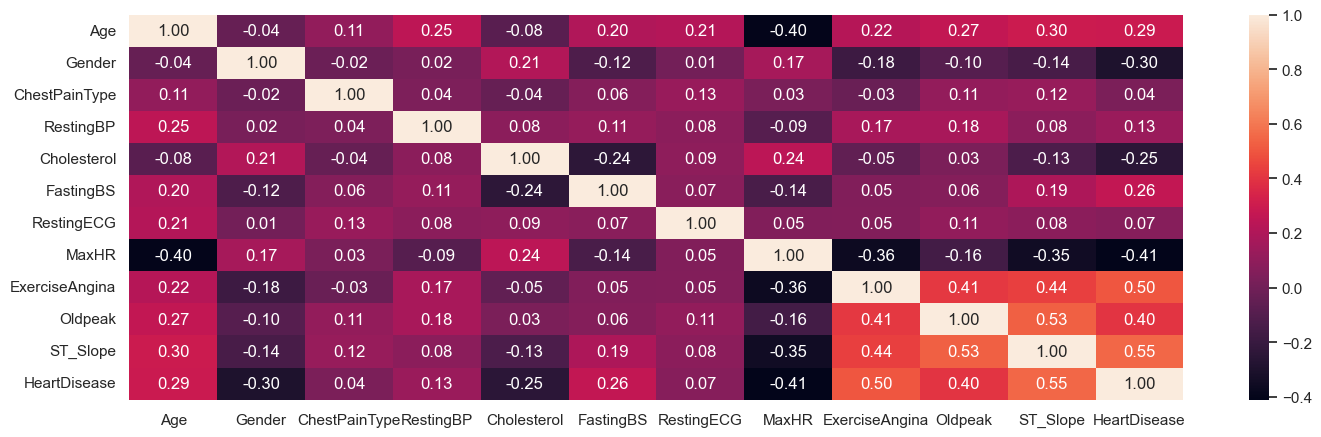

In [21]:
plt.figure(figsize=(17,5))
sns.heatmap(df_train.corr(), annot=True, fmt = ".2f")

## Skewness Check

In [22]:
print('Skewness of Age:',skew(df_train['Age']))
print('Skewness of RestingBP:',skew(df_train['RestingBP']))
print('Skewness of Cholesterol:',skew(df_train['Cholesterol']))
print('Skewness of MaxHR:',skew(df_train['MaxHR']))
print('Skewness of Oldpeak:',skew(df_train['Oldpeak']))

Skewness of Age: -0.20132044623487208
Skewness of RestingBP: 0.13305919181803294
Skewness of Cholesterol: -0.5954163311506641
Skewness of MaxHR: -0.1436176484778425
Skewness of Oldpeak: 1.0470607306424728


In [23]:
df_train['Oldpeak'] = df_train['Oldpeak'].apply(lambda x: np.sqrt(x))

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, PT1000 to PT1733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             734 non-null    int64   
 1   Gender          734 non-null    category
 2   ChestPainType   734 non-null    category
 3   RestingBP       734 non-null    int64   
 4   Cholesterol     734 non-null    int64   
 5   FastingBS       734 non-null    category
 6   RestingECG      734 non-null    category
 7   MaxHR           734 non-null    int64   
 8   ExerciseAngina  734 non-null    category
 9   Oldpeak         725 non-null    float64 
 10  ST_Slope        734 non-null    category
 11  HeartDisease    734 non-null    category
dtypes: category(7), float64(1), int64(4)
memory usage: 56.5+ KB


In [25]:
df_train['Oldpeak'] = df_train['Oldpeak'].fillna(df_train['Oldpeak'].mean())

In [26]:
df_train.isnull().sum()

Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [27]:
print('Skewness of Oldpeak:', skew(df_train['Oldpeak']))

Skewness of Oldpeak: 0.16082073867801192


In [28]:
df_train.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Id,,,,,,,,,,,,
PT1000,42,0,0,120,198,0,0,155,0,0.000000,0,0
PT1001,54,0,1,140,239,0,0,160,0,1.095445,0,0
PT1002,60,0,2,141,316,1,1,122,1,1.303840,1,1
PT1003,54,0,1,124,266,0,2,109,1,1.483240,1,1
PT1004,55,0,0,160,292,1,0,143,1,1.414214,1,1


## Feature Selection

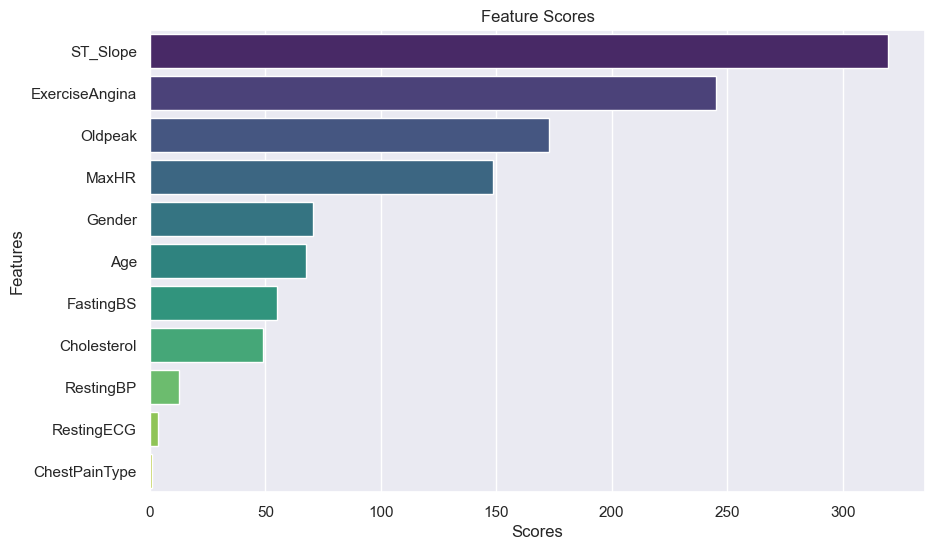

In [29]:
df_predictors = df_train.drop(["HeartDisease"], axis = 1)
df_response = df_train["HeartDisease"]
selector = SelectKBest(f_classif, k=11)
predictors_selected = selector.fit_transform(df_predictors, df_response)

selected_features = df_predictors.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame to store the feature names and their scores
feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)

# Plot the feature scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')
plt.title('Feature Scores')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

## Removing Unused Features

In [30]:
drop_features = df_train[['RestingBP', 'RestingECG', 'ChestPainType']]
df_train = df_train.drop(drop_features, axis=1)
df_train.head()

,Age,Gender,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Id,,,,,,,,,
PT1000,42,0,198,0,155,0,0.000000,0,0
PT1001,54,0,239,0,160,0,1.095445,0,0
PT1002,60,0,316,1,122,1,1.303840,1,1
PT1003,54,0,266,0,109,1,1.483240,1,1
PT1004,55,0,292,1,143,1,1.414214,1,1


In [31]:
drop_features_test = df_test[['RestingBP', 'RestingECG', 'ChestPainType']]
df_test = df_test.drop(drop_features, axis=1)
df_test.head()

,Age,Gender,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Id,,,,,,,,,
PT1800,64,0,273,0,102,1,4.0,2,1
PT1801,58,0,318,0,140,0,4.4,2,1
PT1802,47,1,257,0,135,0,1.0,0,0
PT1803,64,0,244,1,116,1,1.5,1,1
PT1804,47,0,0,1,120,1,0.0,1,1


## Scaling Features

In [32]:
sc = StandardScaler()

In [33]:
train_cols = ['Age', 'Gender', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'ST_Slope', 'Oldpeak']
df_train[train_cols] = sc.fit_transform(df_train[train_cols])
df_train.head()

,Age,Gender,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Id,,,,,,,,,
PT1000,-1.218505,-0.519515,-0.003107,-0.553218,0.722367,-0.836106,-1.104222,-1.086645,0
PT1001,0.041781,-0.519515,0.372390,-0.553218,0.916829,-0.836106,0.598991,-1.086645,0
PT1002,0.671923,-0.519515,1.077591,1.807607,-0.561076,1.196020,0.923007,0.564695,1
PT1003,0.041781,-0.519515,0.619668,-0.553218,-1.066675,1.196020,1.201940,0.564695,1
PT1004,0.146804,-0.519515,0.857788,1.807607,0.255661,1.196020,1.094617,0.564695,1


In [34]:
test_cols = ['Age', 'Gender', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'ST_Slope', 'Oldpeak']
df_test[test_cols] = sc.fit_transform(df_test[test_cols])
df_test.head()

,Age,Gender,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Id,,,,,,,,,
PT1800,1.201531,-0.501698,0.658781,-0.543852,-1.495465,1.290994,2.811259,2.380634,1
PT1801,0.537289,-0.501698,1.068447,-0.543852,0.068443,-0.774597,3.165797,2.380634,1
PT1802,-0.680486,1.993232,0.513122,-0.543852,-0.137334,-0.774597,0.152220,-0.925303,0
PT1803,1.201531,-0.501698,0.394774,1.838737,-0.919288,1.290994,0.595393,0.727666,1
PT1804,-0.680486,-0.501698,-1.826528,1.838737,-0.754666,1.290994,-0.734126,0.727666,1


# Data Split

In [35]:
Y = df_train['HeartDisease']
X = df_train.drop('HeartDisease', axis=1)

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 5)

print('Train Shape (rows, columns):', X_train.shape)
print('Validation Shape (rows, columns):', X_val.shape)

Train Shape (rows, columns): (587, 8)
Validation Shape (rows, columns): (147, 8)


# Modelling

## Logistics Regression

In [36]:
reg = LogisticRegression()

In [37]:
reg.fit(X_train, Y_train)

LogisticRegression()

In [38]:
Y_predict = reg.predict(X_val)

In [39]:
accuracy = accuracy_score(Y_val, Y_predict)

In [40]:
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

Validation Accuracy: 86.39%


In [41]:
print(classification_report(Y_val, Y_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        67
           1       0.88      0.86      0.87        80

    accuracy                           0.86       147
   macro avg       0.86      0.86      0.86       147
weighted avg       0.86      0.86      0.86       147



## Decision Tree

In [42]:
clf = DecisionTreeClassifier()

In [43]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [44]:
Y_predict = clf.predict(X_val)

In [45]:
accuracy = accuracy_score(Y_val, Y_predict)

In [46]:
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

Validation Accuracy: 78.91%


In [47]:
print(classification_report(Y_val, Y_predict))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        67
           1       0.83      0.78      0.80        80

    accuracy                           0.79       147
   macro avg       0.79      0.79      0.79       147
weighted avg       0.79      0.79      0.79       147



## Neural Network

In [48]:
mlp = MLPClassifier(hidden_layer_sizes=(20), max_iter=1000)

In [49]:
mlp.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=20, max_iter=1000)

In [50]:
Y_predict = mlp.predict(X_val)

In [51]:
accuracy = accuracy_score(Y_val, Y_predict)

In [52]:
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

Validation Accuracy: 88.44%


In [53]:
print(classification_report(Y_val, Y_predict))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        67
           1       0.89      0.90      0.89        80

    accuracy                           0.88       147
   macro avg       0.88      0.88      0.88       147
weighted avg       0.88      0.88      0.88       147



## Model Comparision 

In [54]:
seed = 2024

models = [
    MLPClassifier(hidden_layer_sizes=(20), max_iter=1000),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
]

E:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


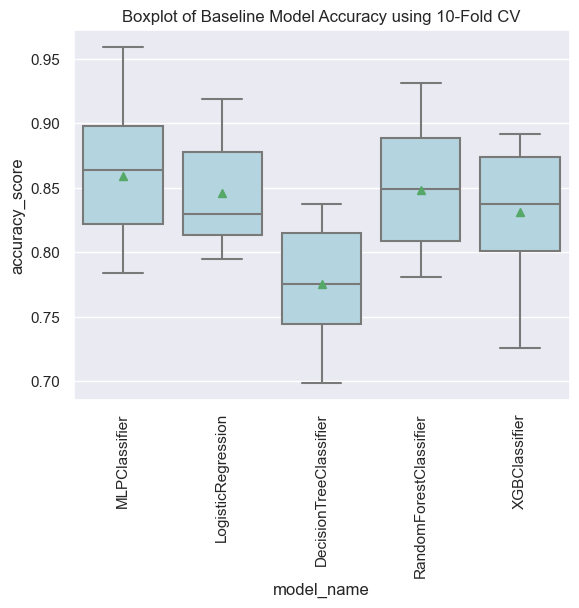

,Mean,Standard Deviation
model_name,,
MLPClassifier,0.859608,0.054924
RandomForestClassifier,0.848667,0.051195
LogisticRegression,0.845983,0.041839
XGBClassifier,0.830914,0.052114
DecisionTreeClassifier,0.775083,0.045738


In [55]:
def generate_baseline_results(models, X, y, metrics, cv=10, plot_results=False):
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
            
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
    
    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data = cv_df, color='lightblue', showmeans=True)
        plt.title('Boxplot of Baseline Model Accuracy using 10-Fold CV')
        plt.xticks(rotation=90)
        plt.show()
        
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat([mean, std], axis = 1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']
    
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)
        
    return baseline_results

generate_baseline_results(models, X, Y, metrics='accuracy', cv=10, plot_results=True)
        

In [56]:
X_test = df_test.drop(["HeartDisease"], axis = 1)
Y_test = df_test["HeartDisease"]

In [57]:
np.array(Y_test)

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [58]:
Y_preds = mlp.predict(X_test)

In [59]:
Y_preds

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [60]:
np.mean(Y_preds == Y_test)

0.8586956521739131

# Explainable AI

In [61]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [62]:
!pip install lime

Defaulting to user installation because normal site-packages is not writeable


In [63]:
import shap

In [65]:
explainer = shap.Explainer(mlp.predict, X_train)

In [66]:
shap_values = explainer(X_train)

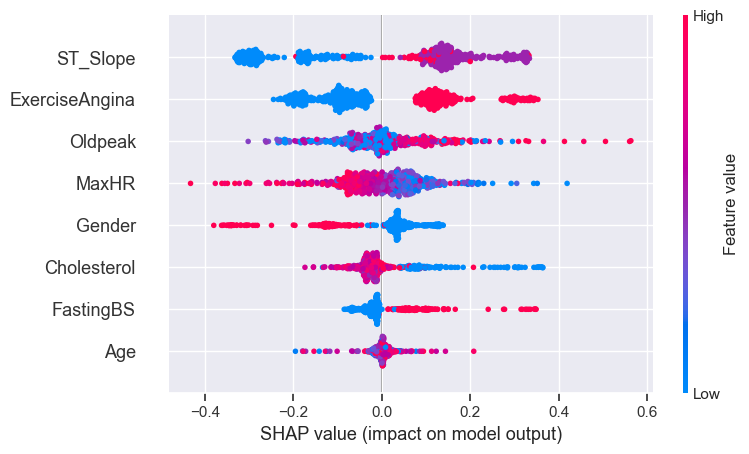

In [67]:
shap.summary_plot(shap_values)

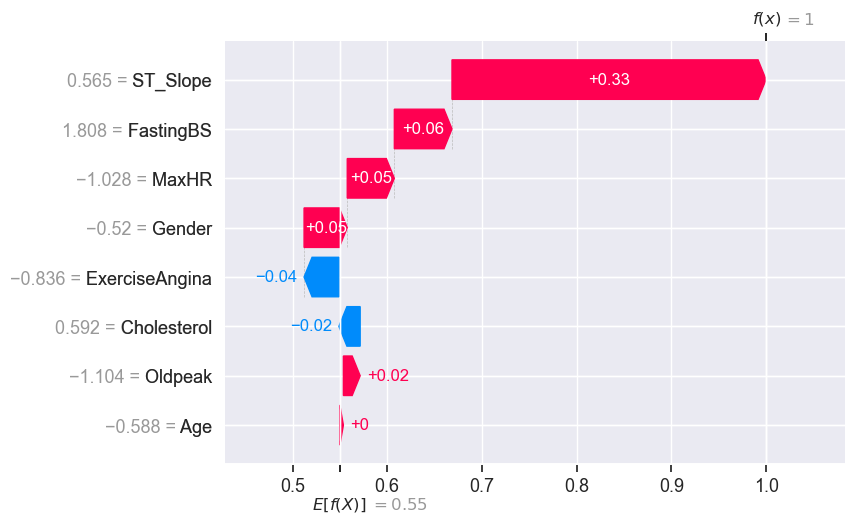

In [69]:
shap.plots.waterfall(shap_values[0])

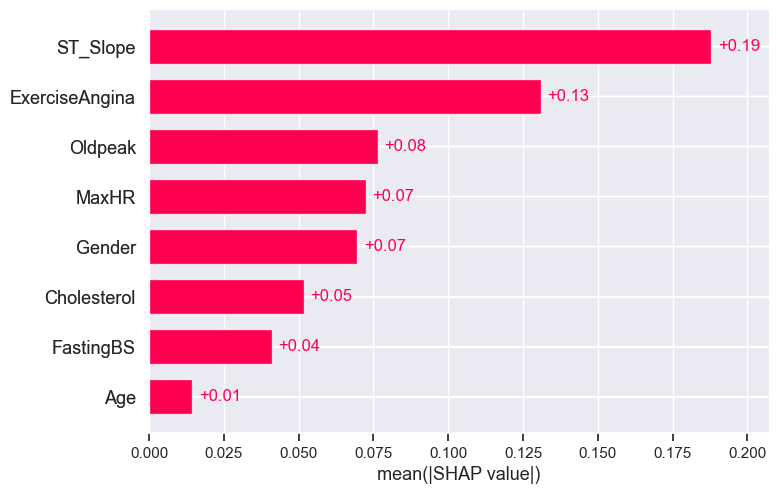

In [70]:
shap.plots.bar(shap_values)